# Anti-aliasing method를 Consistency의 향상을 기대할 수 있다.

https://github.com/adobe/antialiased-cnns

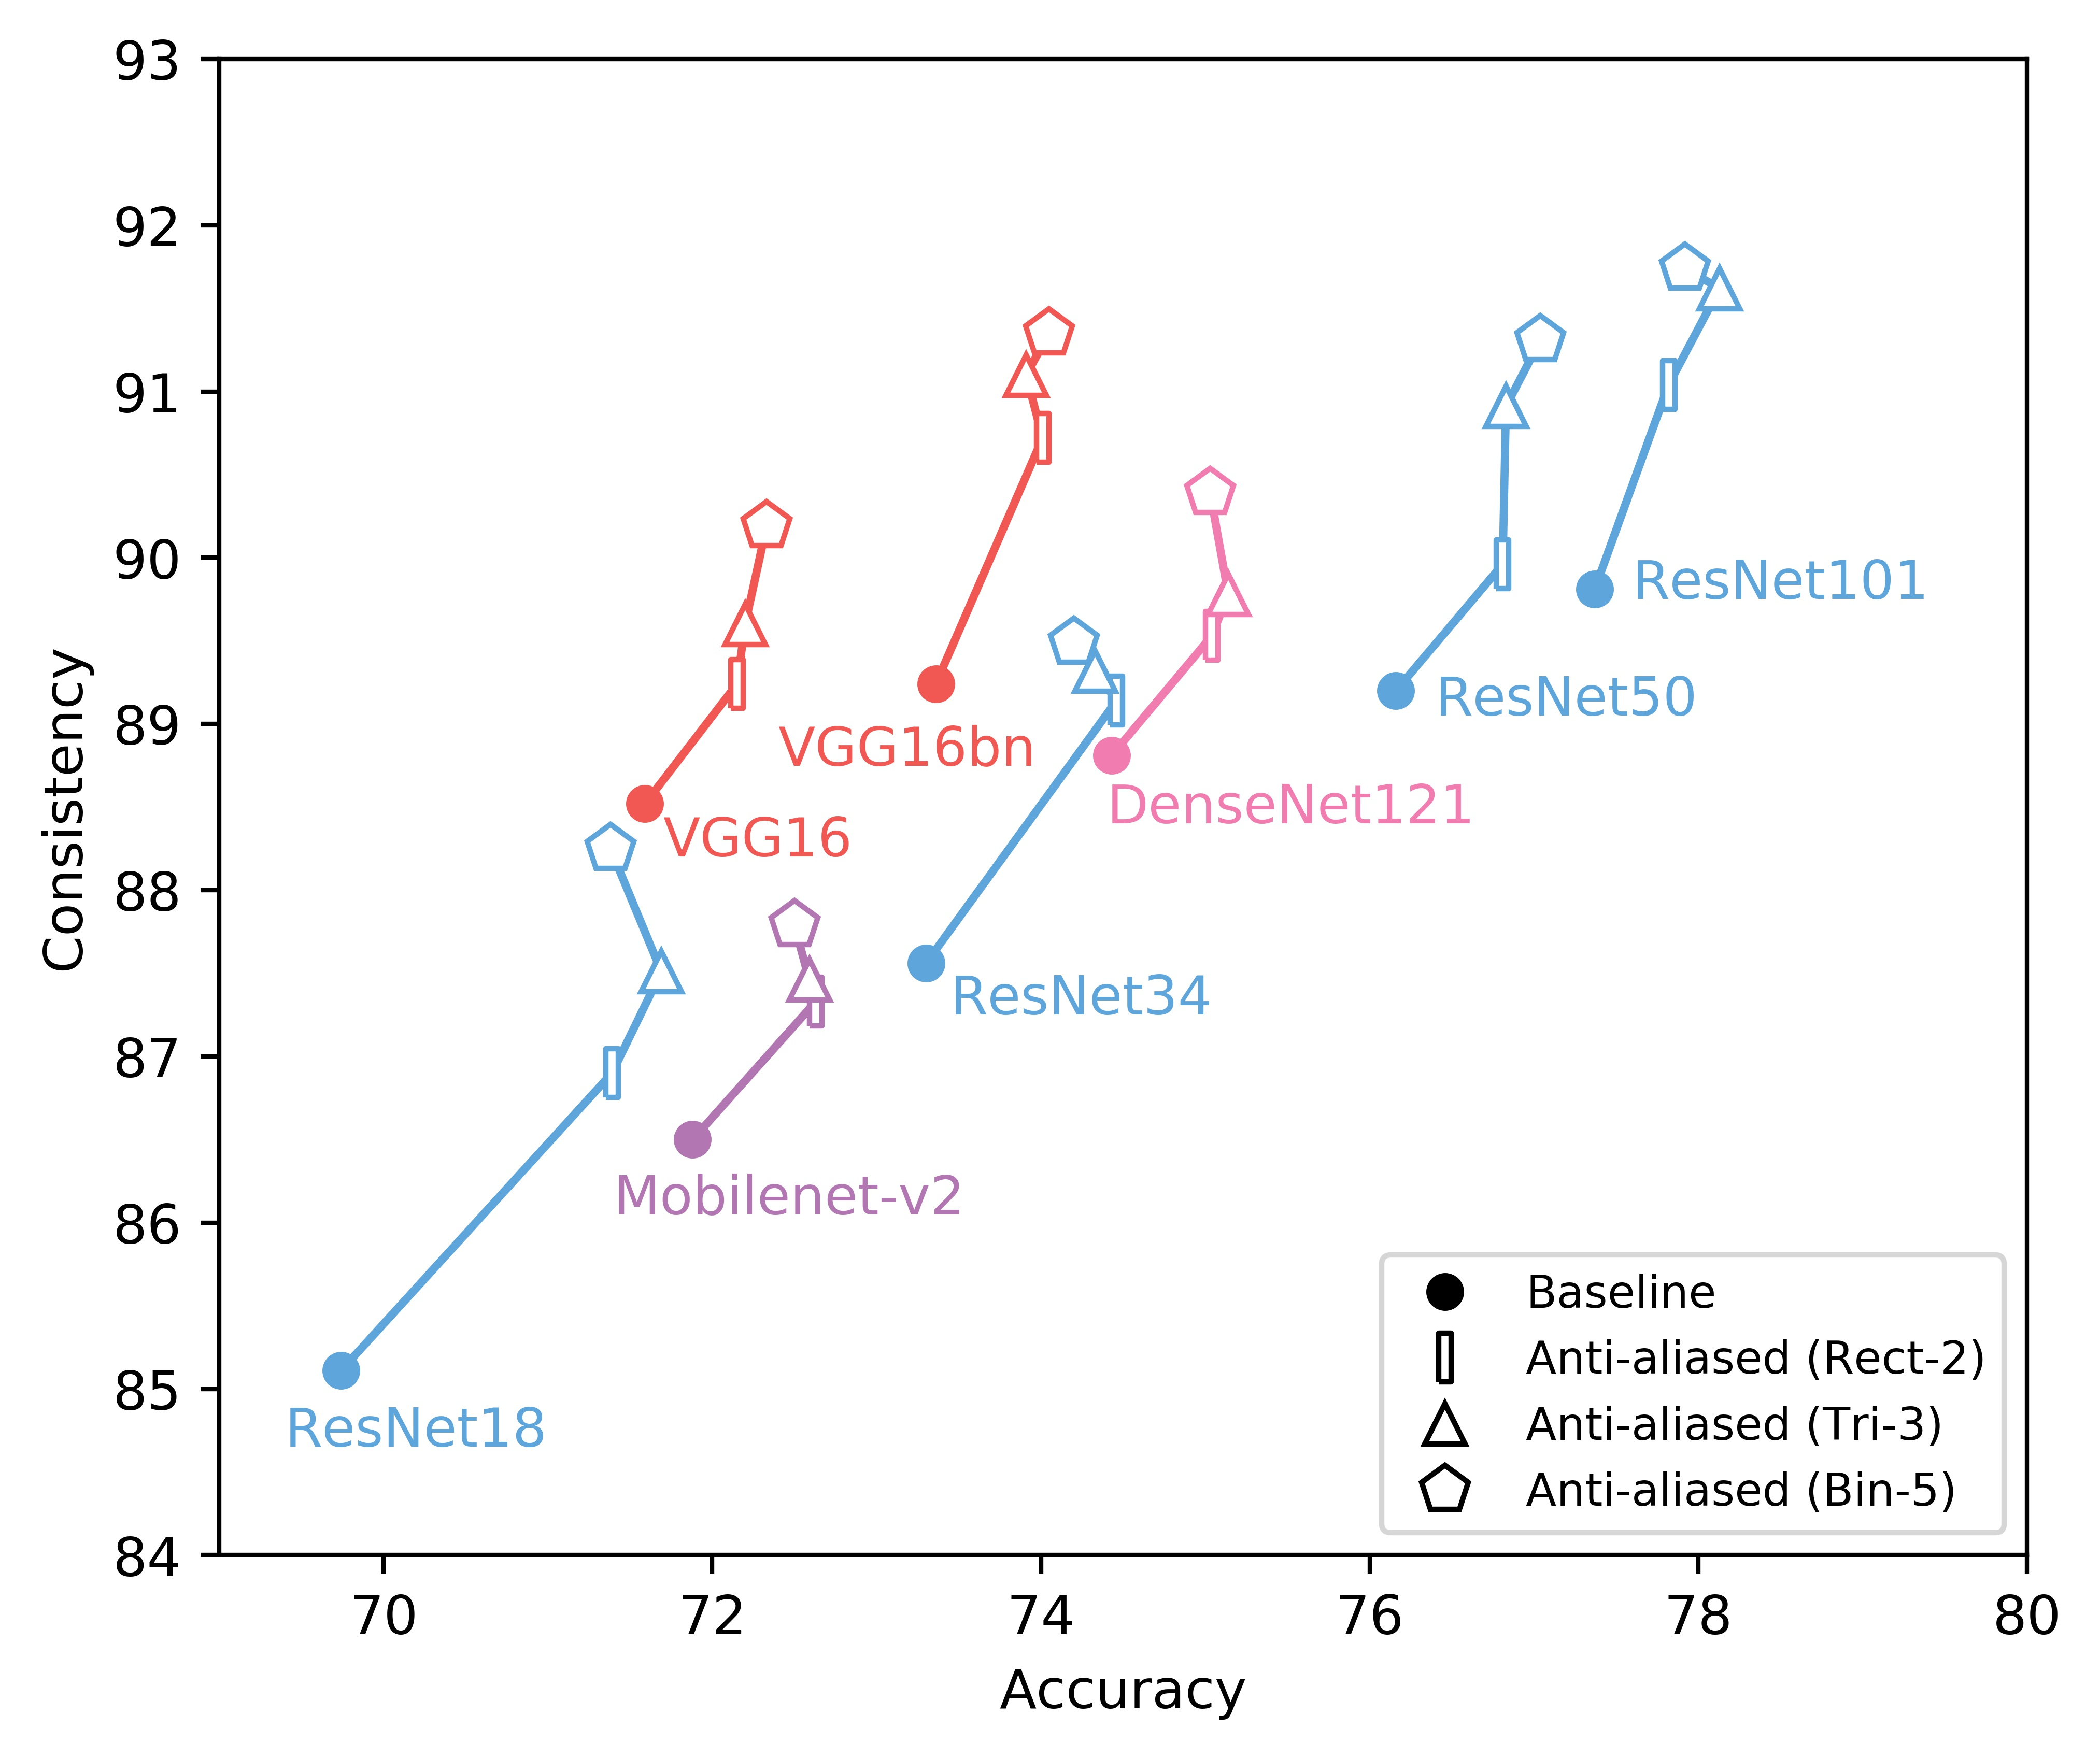

In [ ]:
!pip install antialiased-cnns

활용 가능한 model은 다음과 같다.

In [ ]:
import antialiased_cnns


model = antialiased_cnns.alexnet(pretrained=True)

model = antialiased_cnns.vgg11(pretrained=True)
model = antialiased_cnns.vgg11_bn(pretrained=True)
model = antialiased_cnns.vgg13(pretrained=True)
model = antialiased_cnns.vgg13_bn(pretrained=True)
model = antialiased_cnns.vgg16(pretrained=True)
model = antialiased_cnns.vgg16_bn(pretrained=True)
model = antialiased_cnns.vgg19(pretrained=True)
model = antialiased_cnns.vgg19_bn(pretrained=True)

model = antialiased_cnns.resnet18(pretrained=True)
model = antialiased_cnns.resnet34(pretrained=True)
model = antialiased_cnns.resnet50(pretrained=True)
model = antialiased_cnns.resnet101(pretrained=True)
model = antialiased_cnns.resnet152(pretrained=True)

model = antialiased_cnns.wide_resnet50_2(pretrained=True)
model = antialiased_cnns.wide_resnet101_2(pretrained=True)

model = antialiased_cnns.resnext50_32x4d(pretrained=True)
model = antialiased_cnns.resnext101_32x8d(pretrained=True)

model = antialiased_cnns.densenet121(pretrained=True)
model = antialiased_cnns.densenet169(pretrained=True)
model = antialiased_cnns.densenet201(pretrained=True)
model = antialiased_cnns.densenet161(pretrained=True)

model = antialiased_cnns.mobilenet_v2(pretrained=True)

사용하고자 하는 model을 antialiased_cnns 에서 불러와서
parameter들을 copy하면 된다.

In [ ]:
import antialiased_cnns
import torchvision.models as models

old_model = antialiased_cnns.resnet50(pretrained=True)
antialiased_cnns.copy_params_buffers(old_model, model) # copy the weights over

방법은 간단한데, 먼저 stride = 1 에 대해서 연산을 수행하고, **BlurPool**을 사용해서 downsampling을 한다.

In [ ]:
import antialiased_cnns

# MaxPool --> MaxBlurPool
baseline = nn.MaxPool2d(kernel_size=2, stride=2)
antialiased = [nn.MaxPool2d(kernel_size=2, stride=1), 
    antialiased_cnns.BlurPool(C, stride=2)]
    
# Conv --> ConvBlurPool
baseline = [nn.Conv2d(Cin, C, kernel_size=3, stride=2, padding=1), 
    nn.ReLU(inplace=True)]
antialiased = [nn.Conv2d(Cin, C, kernel_size=3, stride=1, padding=1),
    nn.ReLU(inplace=True),
    antialiased_cnns.BlurPool(C, stride=2)]

# AvgPool --> BlurPool
baseline = nn.AvgPool2d(kernel_size=2, stride=2)
antialiased = antialiased_cnns.BlurPool(C, stride=2)

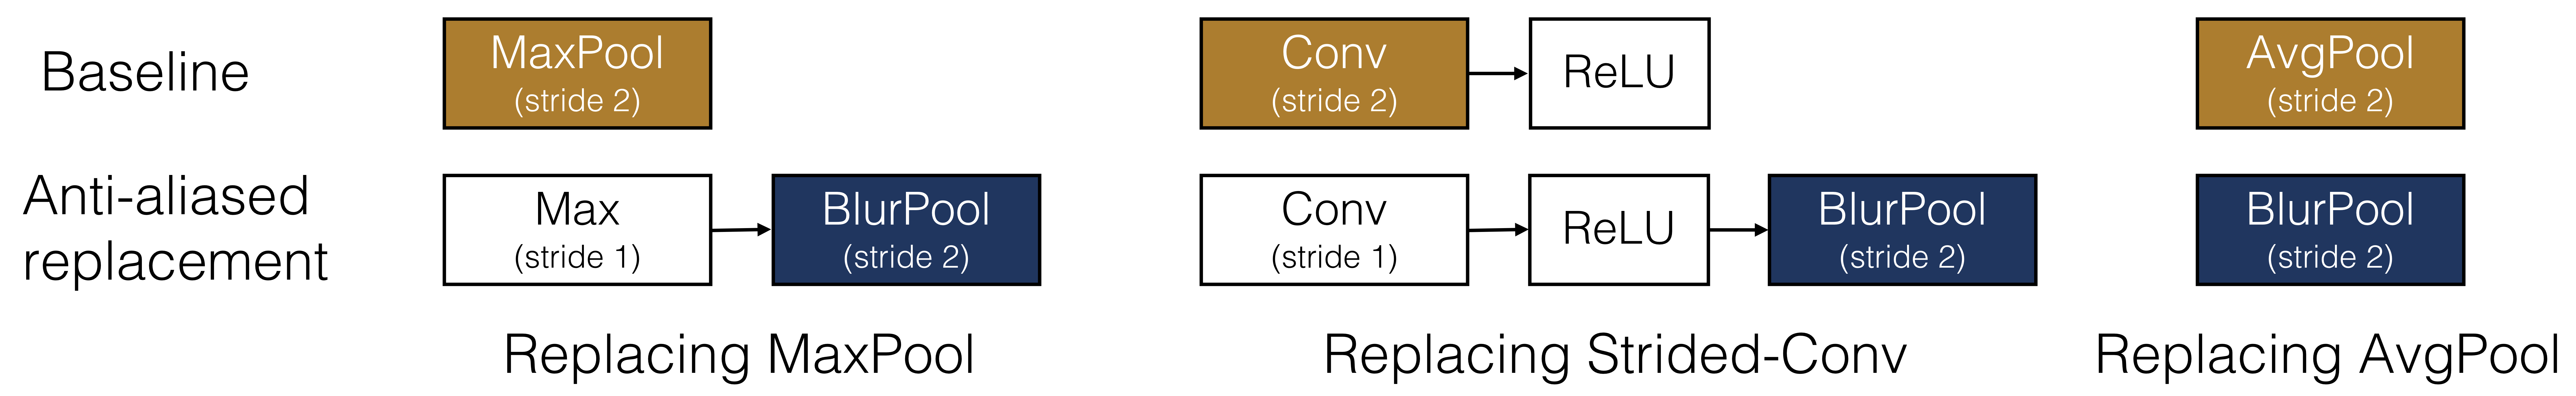